In [1]:
###
# Session analysis for the Polymath data
###

In [2]:
# pip install pandasql 

In [2]:
#need to store the data in a dataframe
import pandas as pd 
import pandasql
from pandasql import sqldf
from datetime import datetime

In [3]:
### reading csv into dataframe
df = pd.read_csv('/Users/jennaolsen/Library/CloudStorage/Dropbox/PhD/Polymath1 Project/person_sessions.csv')
# df = pd.read_csv('/Users/jennaolsen/Library/CloudStorage/Dropbox/PhD/Polymath1 Project/for_session_analysis.csv', usecols= ['blog_counter','post_code','post_author','move_category','move_name','post_text','updated_timestamp'])
print(df)

     blog_counter  post_code updated_timestamp   post_author  \
0           C2963  Gowers_14     3/18/09 21:12          Amir   
1           C2789  Gowers_14      3/12/09 5:08     anonymous   
2      CTao_38079      Tao_8       4/9/09 5:01     Anonymous   
3           C1734   Gowers_4       2/3/09 6:14         Boris   
4           C1759   Gowers_4      2/3/09 16:52         Boris   
...           ...        ...               ...           ...   
2123        C1718   Gowers_4      2/2/09 22:40  Tyler Neylon   
2124        C1776   Gowers_4      2/3/09 19:45  Tyler Neylon   
2125   CTao_35495      Tao_2       2/6/09 2:20  Tyler Neylon   
2126   CTao_35499      Tao_2       2/6/09 3:46  Tyler Neylon   
2127   CTao_35660      Tao_2      2/10/09 3:56  Tyler Neylon   

            move_category            move_name  
0     check understanding  answer or statement  
1     check understanding  answer or statement  
2     check understanding     asking questions  
3     check understanding  answer o

In [4]:
df['updated_timestamp'] = pd.to_datetime(df['updated_timestamp'])

In [5]:
# basic statistics for individuals with multiple comments
query = """ 
        SELECT post_code, count(*) as records
            ,count(distinct(post_author)) as authors_intereacting
            ,min(updated_timestamp) as first_interaction
            ,max(updated_timestamp) as last_interaction
        from df
            group by post_code
                having count(*) > 1
        order by records desc, authors_intereacting
            ;
        """

result = sqldf(query)
result

,post_code,records,authors_intereacting,first_interaction,last_interaction
0,Gowers_4,182,16,2009-02-01 12:43:00.000000,2009-02-08 20:23:00.000000
1,Gowers_15,136,10,2009-03-16 12:16:00.000000,2009-06-25 08:45:00.000000
2,Gowers_11,120,9,2009-02-23 09:57:00.000000,2009-03-02 00:22:00.000000
3,Gowers_13,118,10,2009-03-09 23:21:00.000000,2009-07-02 10:17:00.000000
4,Tao_6,117,12,2009-03-14 09:08:00.000000,2009-03-30 15:23:00.000000
5,Gowers_14,116,47,2009-03-10 21:42:00.000000,2009-05-25 23:22:00.000000
6,Gowers_8,115,9,2009-02-08 15:53:00.000000,2009-02-15 09:57:00.000000
7,Gowers_9,114,7,2009-02-13 07:27:00.000000,2011-04-10 08:24:00.000000
8,Gowers_12,114,8,2009-03-01 23:37:00.000000,2009-03-18 22:23:00.000000
9,Tao_9,109,10,2009-05-22 18:17:00.000000,2009-06-14 01:24:00.000000


In [6]:
# data frame with the prev timestamp for each post
query = """ 
        with 
            r as (
                select distinct post_code as pa
                from result
                where records > 1
                )
            ,lagged_timestamp as (    
                SELECT distinct df.post_code, df.blog_counter, df.post_author, df.updated_timestamp
                    ,lag(df.updated_timestamp) over 
                        (partition by df.post_code order by df.updated_timestamp) as prev_timestamp
                from df
                join r on df.post_code = r.pa
            )
            select *
            from lagged_timestamp lt
            where prev_timestamp != 'None'
            ;
        """

result_s = sqldf(query)
result_s

,post_code,blog_counter,post_author,updated_timestamp,prev_timestamp
0,Gowers_1,C1589,Michael Lugo,2009-01-27 17:20:00.000000,2009-01-27 15:47:00.000000
1,Gowers_1,C1590,gowers,2009-01-27 17:37:00.000000,2009-01-27 17:20:00.000000
2,Gowers_1,C1591,D. Eppstein,2009-01-27 18:40:00.000000,2009-01-27 17:37:00.000000
3,Gowers_1,C1592,davidc,2009-01-27 18:43:00.000000,2009-01-27 18:40:00.000000
4,Gowers_1,C1593,Jack Snoeyink,2009-01-27 18:53:00.000000,2009-01-27 18:43:00.000000
...,...,...,...,...,...
2089,Tao_9,CTao_39428,Kristal Cantwell,2009-06-13 16:57:00.000000,2009-06-13 12:39:00.000000
2090,Tao_9,CTao_39431,Terence Tao,2009-06-13 20:11:00.000000,2009-06-13 16:57:00.000000
2091,Tao_9,CTao_39437,Michael Peake,2009-06-14 00:43:00.000000,2009-06-13 20:11:00.000000
2092,Tao_9,CTao_39440,Terence Tao,2009-06-14 01:02:00.000000,2009-06-14 00:43:00.000000


In [7]:
result_s['updated_timestamp'] = pd.to_datetime(result_s['updated_timestamp'])
result_s['prev_timestamp'] = pd.to_datetime(result_s['prev_timestamp'])

In [8]:
result_s['minutes_between'] = (result_s['updated_timestamp'] - result_s['prev_timestamp']).dt.total_seconds()/60
# result_s['hours_between'] = result_s['minutes_between']/60

In [9]:
print(result_s)

     post_code blog_counter       post_author   updated_timestamp  \
0     Gowers_1        C1589      Michael Lugo 2009-01-27 17:20:00   
1     Gowers_1        C1590            gowers 2009-01-27 17:37:00   
2     Gowers_1        C1591       D. Eppstein 2009-01-27 18:40:00   
3     Gowers_1        C1592            davidc 2009-01-27 18:43:00   
4     Gowers_1        C1593     Jack Snoeyink 2009-01-27 18:53:00   
...        ...          ...               ...                 ...   
2089     Tao_9   CTao_39428  Kristal Cantwell 2009-06-13 16:57:00   
2090     Tao_9   CTao_39431       Terence Tao 2009-06-13 20:11:00   
2091     Tao_9   CTao_39437     Michael Peake 2009-06-14 00:43:00   
2092     Tao_9   CTao_39440       Terence Tao 2009-06-14 01:02:00   
2093     Tao_9   CTao_39442       Terence Tao 2009-06-14 01:24:00   

          prev_timestamp  minutes_between  
0    2009-01-27 15:47:00             93.0  
1    2009-01-27 17:20:00             17.0  
2    2009-01-27 17:37:00             63

In [11]:
# pulling posts with at least one session
query = """ 
        with 
            r as (
                select distinct post_code as pa 
                from result_s 
                where minutes_between <= 30
                )
            ,session_incrementer as (    
                select lt.*
                    ,case when minutes_between > 30 then 1 else 0 end as session_incrementer
                from result_s lt
                join r on lt.post_code = r.pa
            )
            
            select si.*
                ,sum(session_incrementer) over (partition by post_code order by updated_timestamp) as session_num
            from session_incrementer si
            
            ;
        """

result_sessions = sqldf(query)
result_sessions

,post_code,blog_counter,post_author,updated_timestamp,prev_timestamp,minutes_between,session_incrementer,session_num
0,Gowers_1,C1589,Michael Lugo,2009-01-27 17:20:00.000000,2009-01-27 15:47:00.000000,93.0,1,1
1,Gowers_1,C1590,gowers,2009-01-27 17:37:00.000000,2009-01-27 17:20:00.000000,17.0,0,1
2,Gowers_1,C1591,D. Eppstein,2009-01-27 18:40:00.000000,2009-01-27 17:37:00.000000,63.0,1,2
3,Gowers_1,C1592,davidc,2009-01-27 18:43:00.000000,2009-01-27 18:40:00.000000,3.0,0,2
4,Gowers_1,C1593,Jack Snoeyink,2009-01-27 18:53:00.000000,2009-01-27 18:43:00.000000,10.0,0,2
...,...,...,...,...,...,...,...,...
2061,Tao_9,CTao_39428,Kristal Cantwell,2009-06-13 16:57:00.000000,2009-06-13 12:39:00.000000,258.0,1,81
2062,Tao_9,CTao_39431,Terence Tao,2009-06-13 20:11:00.000000,2009-06-13 16:57:00.000000,194.0,1,82
2063,Tao_9,CTao_39437,Michael Peake,2009-06-14 00:43:00.000000,2009-06-13 20:11:00.000000,272.0,1,83
2064,Tao_9,CTao_39440,Terence Tao,2009-06-14 01:02:00.000000,2009-06-14 00:43:00.000000,19.0,0,83


In [12]:
# pulling posts with at least one session
query = """ 
            select post_code, session_num
                ,count(distinct(post_code)) as posts_in_session
                ,min(updated_timestamp) as start_of_session
                ,max(updated_timestamp) as end_of_session
                ,count(*) as actions_in_session
                ,avg(minutes_between) as avg_minutes_between_actions
                ,min(minutes_between) as min_minutes_between_actions
                ,max(minutes_between) as max_minutes_between_actions
            from result_sessions si
            group by post_code, session_num
            ;
        """

player_sessions = sqldf(query)
player_sessions

,post_code,session_num,posts_in_session,start_of_session,end_of_session,actions_in_session,avg_minutes_between_actions,min_minutes_between_actions,max_minutes_between_actions
0,Gowers_1,1,1,2009-01-27 17:20:00.000000,2009-01-27 17:37:00.000000,2,55.000000,17.0,93.0
1,Gowers_1,2,1,2009-01-27 18:40:00.000000,2009-01-27 18:53:00.000000,3,25.333333,3.0,63.0
2,Gowers_1,3,1,2009-01-27 20:24:00.000000,2009-01-27 20:24:00.000000,1,91.000000,91.0,91.0
3,Gowers_1,4,1,2009-01-28 00:49:00.000000,2009-01-28 00:49:00.000000,1,265.000000,265.0,265.0
4,Gowers_1,5,1,2009-01-28 04:29:00.000000,2009-01-28 04:29:00.000000,1,220.000000,220.0,220.0
...,...,...,...,...,...,...,...,...,...
1274,Tao_9,79,1,2009-06-13 09:30:00.000000,2009-06-13 10:46:00.000000,6,22.000000,8.0,56.0
1275,Tao_9,80,1,2009-06-13 12:39:00.000000,2009-06-13 12:39:00.000000,1,113.000000,113.0,113.0
1276,Tao_9,81,1,2009-06-13 16:57:00.000000,2009-06-13 16:57:00.000000,1,258.000000,258.0,258.0
1277,Tao_9,82,1,2009-06-13 20:11:00.000000,2009-06-13 20:11:00.000000,1,194.000000,194.0,194.0


In [13]:
# single action sessions
query = """ 
           select * from player_sessions where actions_in_session = 1
            ;
        """

player_sessions_single_action = sqldf(query)
player_sessions_single_action

,post_code,session_num,posts_in_session,start_of_session,end_of_session,actions_in_session,avg_minutes_between_actions,min_minutes_between_actions,max_minutes_between_actions
0,Gowers_1,3,1,2009-01-27 20:24:00.000000,2009-01-27 20:24:00.000000,1,91.0,91.0,91.0
1,Gowers_1,4,1,2009-01-28 00:49:00.000000,2009-01-28 00:49:00.000000,1,265.0,265.0,265.0
2,Gowers_1,5,1,2009-01-28 04:29:00.000000,2009-01-28 04:29:00.000000,1,220.0,220.0,220.0
3,Gowers_1,6,1,2009-01-28 12:45:00.000000,2009-01-28 12:45:00.000000,1,496.0,496.0,496.0
4,Gowers_1,9,1,2009-01-28 23:33:00.000000,2009-01-28 23:33:00.000000,1,311.0,311.0,311.0
...,...,...,...,...,...,...,...,...,...
908,Tao_9,76,1,2009-06-13 02:48:00.000000,2009-06-13 02:48:00.000000,1,360.0,360.0,360.0
909,Tao_9,77,1,2009-06-13 04:18:00.000000,2009-06-13 04:18:00.000000,1,90.0,90.0,90.0
910,Tao_9,80,1,2009-06-13 12:39:00.000000,2009-06-13 12:39:00.000000,1,113.0,113.0,113.0
911,Tao_9,81,1,2009-06-13 16:57:00.000000,2009-06-13 16:57:00.000000,1,258.0,258.0,258.0


In [14]:
# multi action sessions
query = """ 
           select * from player_sessions where actions_in_session > 1;
        """

player_sessions_multi_action = sqldf(query)
player_sessions_multi_action

,post_code,session_num,posts_in_session,start_of_session,end_of_session,actions_in_session,avg_minutes_between_actions,min_minutes_between_actions,max_minutes_between_actions
0,Gowers_1,1,1,2009-01-27 17:20:00.000000,2009-01-27 17:37:00.000000,2,55.000000,17.0,93.0
1,Gowers_1,2,1,2009-01-27 18:40:00.000000,2009-01-27 18:53:00.000000,3,25.333333,3.0,63.0
2,Gowers_1,7,1,2009-01-28 14:14:00.000000,2009-01-28 14:35:00.000000,2,55.000000,21.0,89.0
3,Gowers_1,8,1,2009-01-28 18:11:00.000000,2009-01-28 18:22:00.000000,2,113.500000,11.0,216.0
4,Gowers_1,13,1,2009-01-30 16:30:00.000000,2009-01-30 16:44:00.000000,2,24.500000,14.0,35.0
...,...,...,...,...,...,...,...,...,...
361,Tao_9,65,1,2009-06-11 20:56:00.000000,2009-06-11 21:27:00.000000,5,14.200000,4.0,40.0
362,Tao_9,73,1,2009-06-12 17:18:00.000000,2009-06-12 17:37:00.000000,2,59.500000,19.0,100.0
363,Tao_9,78,1,2009-06-13 08:03:00.000000,2009-06-13 08:34:00.000000,3,85.333333,13.0,225.0
364,Tao_9,79,1,2009-06-13 09:30:00.000000,2009-06-13 10:46:00.000000,6,22.000000,8.0,56.0


In [15]:
player_sessions_multi_action['end_of_session'] = pd.to_datetime(player_sessions_multi_action['end_of_session'])
player_sessions_multi_action['start_of_session'] = pd.to_datetime(player_sessions_multi_action['start_of_session'])
player_sessions_multi_action['session_length_minutes'] = (player_sessions_multi_action['end_of_session'] - player_sessions_multi_action['start_of_session']).dt.total_seconds()/60
player_sessions_multi_action

,post_code,session_num,posts_in_session,start_of_session,end_of_session,actions_in_session,avg_minutes_between_actions,min_minutes_between_actions,max_minutes_between_actions,session_length_minutes
0,Gowers_1,1,1,2009-01-27 17:20:00,2009-01-27 17:37:00,2,55.000000,17.0,93.0,17.0
1,Gowers_1,2,1,2009-01-27 18:40:00,2009-01-27 18:53:00,3,25.333333,3.0,63.0,13.0
2,Gowers_1,7,1,2009-01-28 14:14:00,2009-01-28 14:35:00,2,55.000000,21.0,89.0,21.0
3,Gowers_1,8,1,2009-01-28 18:11:00,2009-01-28 18:22:00,2,113.500000,11.0,216.0,11.0
4,Gowers_1,13,1,2009-01-30 16:30:00,2009-01-30 16:44:00,2,24.500000,14.0,35.0,14.0
...,...,...,...,...,...,...,...,...,...,...
361,Tao_9,65,1,2009-06-11 20:56:00,2009-06-11 21:27:00,5,14.200000,4.0,40.0,31.0
362,Tao_9,73,1,2009-06-12 17:18:00,2009-06-12 17:37:00,2,59.500000,19.0,100.0,19.0
363,Tao_9,78,1,2009-06-13 08:03:00,2009-06-13 08:34:00,3,85.333333,13.0,225.0,31.0
364,Tao_9,79,1,2009-06-13 09:30:00,2009-06-13 10:46:00,6,22.000000,8.0,56.0,76.0


In [16]:
# what moves happen as single actions (not in a larger session)
query = """ 
           with d as (
               select ps.session_num, ps.avg_minutes_between_actions as minutes_since_last_action
                   ,df.*
               from df
               join player_sessions_single_action ps 
                   on df.post_code = ps.post_code 
                   and df.updated_timestamp = ps.start_of_session
            )
            select move_category, move_name, count(*) as records
            from d
            group by move_category, move_name
        """

df_ps = sqldf(query)
df_ps

,move_category,move_name,records
0,Move,social,1
1,check understanding,answer or statement,69
2,check understanding,asking questions,68
3,check understanding,both question and answer,3
4,check understanding,correction,2
5,coalescence,alternate approaches,10
6,coalescence,analogous problems,4
7,coalescence,compare to teaching,1
8,coalescence,cross-thread references,7
9,coalescence,external references,20


In [17]:
# what moves happen in a larger session
query = """ 
           with d as (
               select ps.session_num
                   ,df.*
               from df
               join player_sessions_multi_action ps 
                   on df.post_code = ps.post_code 
                   and df.updated_timestamp >= ps.start_of_session
                   and df.updated_timestamp <= ps.end_of_session
            )
            select move_category, move_name, count(*) as records
            from d
            group by move_category, move_name
        """

df_ps = sqldf(query)
df_ps

,move_category,move_name,records
0,check understanding,answer or statement,96
1,check understanding,asking questions,119
2,check understanding,both question and answer,4
3,check understanding,correct prior answer,1
4,coalescence,alternate approaches,18
5,coalescence,analogous problems,7
6,coalescence,compare to teaching,2
7,coalescence,cross-thread references,11
8,coalescence,external references,28
9,coalescence,summarize,8


In [18]:
# what moves happen in a larger session
query = """ 
           with d as (
               select ps.session_num
                   ,df.*
               from df
               join player_sessions_multi_action ps 
                   on df.post_code = ps.post_code 
                   and df.updated_timestamp >= ps.start_of_session
                   and df.updated_timestamp <= ps.end_of_session
            )
            , for_rown as (
                select post_code || '_' || session_num as session_key, move_category, move_name, updated_timestamp
                from d
            )
            select row_number() over (partition by session_key order by updated_timestamp) as rown
                ,session_key, move_category, move_name
                ,move_category || '-' || coalesce(move_name,'None') as move, updated_timestamp
            from for_rown
        """

df_ps = sqldf(query)
df_ps

,rown,session_key,move_category,move_name,move,updated_timestamp
0,1,Gowers_11_1,meta,suggested readings,meta-suggested readings,2009-02-23 18:12:00.000000
1,2,Gowers_11_1,meta,lessons learned,meta-lessons learned,2009-02-23 18:14:00.000000
2,3,Gowers_11_1,meta,next steps,meta-next steps,2009-02-23 18:28:00.000000
3,4,Gowers_11_1,check understanding,asking questions,check understanding-asking questions,2009-02-23 18:47:00.000000
4,1,Gowers_11_11,working the problem,None,working the problem-None,2009-02-24 13:32:00.000000
...,...,...,...,...,...,...
1148,5,Tao_9_79,check understanding,asking questions,check understanding-asking questions,2009-06-13 10:38:00.000000
1149,6,Tao_9_79,working the problem,issue handling,working the problem-issue handling,2009-06-13 10:46:00.000000
1150,1,Tao_9_83,check understanding,asking questions,check understanding-asking questions,2009-06-14 00:43:00.000000
1151,2,Tao_9_83,check understanding,answer or statement,check understanding-answer or statement,2009-06-14 01:02:00.000000


In [19]:
# chronological sequence of moves
df_ps.pivot(index='session_key', columns='rown', values='move')

rown,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
session_key,,,,,,,,,,,,,,,,
Gowers_11_1,meta-suggested readings,meta-lessons learned,meta-next steps,check understanding-asking questions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gowers_11_11,working the problem-None,meta-thought process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gowers_11_12,coalescence-within-thread references,check understanding-asking questions,coalescence-cross-thread references,meta-thought process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gowers_11_16,meta-thought process,check understanding-answer or statement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gowers_11_21,check understanding-asking questions,meta-thought process,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tao_9_65,tools-machine and runtime,meta-thought process,meta-thought process,check understanding-asking questions,working the problem-computer-proof,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tao_9_73,working the problem-issue handling,working the problem-issue handling,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Tao_9_78,working the problem-computer-proof,working the problem-issue handling,working the problem-None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
#### 
# next step - take df_ps and do a network graph of what move categories and names co-occur 
# then do something similar with post-sessions instead of person-sessions
####

In [20]:
# what moves happen together in a person_session
# use the session key for grouping and the updated timestamp for avoiding self-joins

query = """ 
            select df_ps1.move, df_ps2.move as move2
            from df_ps df_ps1
                join df_ps df_ps2 on df_ps1.session_key = df_ps2.session_key
                and df_ps1.updated_timestamp != df_ps2.updated_timestamp
        """

df_move = sqldf(query)

df_moves = (df_move.apply(lambda row: sorted(row), axis=1, result_type='expand')
       .set_axis(df_move.columns, axis=1))

df_moves

,move,move2
0,check understanding-asking questions,meta-suggested readings
1,meta-lessons learned,meta-suggested readings
2,meta-next steps,meta-suggested readings
3,check understanding-asking questions,meta-lessons learned
4,meta-lessons learned,meta-next steps
...,...,...
3785,check understanding-asking questions,working the problem-thread management
3786,check understanding-answer or statement,check understanding-asking questions
3787,check understanding-answer or statement,working the problem-thread management
3788,check understanding-answer or statement,working the problem-thread management


In [22]:
# using documentation for NetworkX
# located here: https://networkx.org/documentation/stable/tutorial.html
# accessed 2023-07-10

In [21]:
import networkx as nx
G = nx.Graph()

In [22]:
# add nodes for different potential moves 
query = """ 
            select distinct move from df_ps
        """

moves = sqldf(query)

# Create an empty list
li_moves = []

# Iterate over each row
for index, rows in moves.iterrows():
    # Create list for the current row
    val = rows.move
      
    # append the list to the final list
    li_moves.append(val)
  
# print(li_moves)

In [23]:
# add edges using this dataframe

# Create an empty list
li_edges = []

# Iterate over each row
for index, rows in df_moves.iterrows():
    # Create list for the current row
    val = [rows.move, rows.move2]
      
    # append the list to the final list
    li_edges.append(val)
  
# print(li_edge_cats)

G.add_edges_from(li_edges)

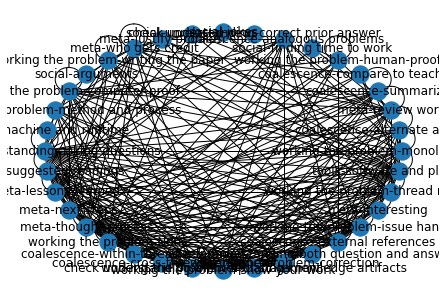

In [24]:
nx.draw_shell(G, with_labels = True)
# getting better

In [25]:
# using just the move categories
# use the session key for grouping and the updated timestamp for avoiding self-joins

query = """ 
            select df_ps1.move_category, df_ps2.move_category as move_category2
            from df_ps df_ps1
                join df_ps df_ps2 on df_ps1.session_key = df_ps2.session_key
                and df_ps1.updated_timestamp != df_ps2.updated_timestamp
        """

df_m = sqldf(query)
df_move_categories = (df_m.apply(lambda row: sorted(row), axis=1, result_type='expand')
       .set_axis(df_m.columns, axis=1))
# df_move_categories
Gcat = nx.Graph()

In [26]:
query = """ 
            select distinct move_category from df_ps
        """

move_cats = sqldf(query)

# Create an empty list
li_move_cats = []

# Iterate over each row
for index, rows in move_cats.iterrows():
    # Create list for the current row
    val = rows.move_category
      
    # append the list to the final list
    li_move_cats.append(val)
  
print(li_move_cats)

['meta', 'check understanding', 'working the problem', 'coalescence', 'tools', 'social']


In [27]:
# add nodes to G
Gcat.add_nodes_from(li_move_cats)

In [28]:
# add edges using this dataframe

# Create an empty list
li_edge_cats = []

# Iterate over each row
for index, rows in df_move_categories.iterrows():
    # Create list for the current row
    val = [rows.move_category, rows.move_category2]
      
    # append the list to the final list
    li_edge_cats.append(val)
  
# print(li_edge_cats)

Gcat.add_edges_from(li_edge_cats)

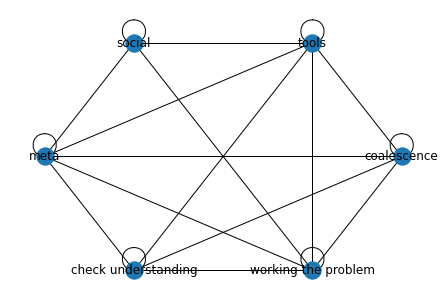

In [29]:
nx.draw_shell(Gcat, with_labels = True)

In [ ]:
### 
# a thing to try - pull just the 21 moves of the pivot interaction and run similar analyses to what is done above
###